In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
from os import walk
import os
import peakutils
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [57]:
RUNS = [97,99]
folder_path ='/Volumes/Work/P64/HERFD'
INEnergy = []
HER_curve = []

for i in range(len(runs)):
    df = folder_path + "/" + 'HERFD_r%04d'%RUNS[i] + '.txt'
    ColumnsName = ['Energy','Intensity']
    CSVdata = pd.read_csv(df, sep=',')
    CSVdata.columns = ColumnsName
    Matrix = CSVdata.as_matrix(columns=CSVdata.columns[0:])
    INEnergy = Matrix[:,0]
    HER_curve.append(Matrix[:,1])
INEnergy = np.array(INEnergy)
HER_curve = np.array(HER_curve)
HER_curve_final = np.average(HER_curve, axis = 0)

NorHERFD = os.path.join('/Volumes/Work/P64/HERFD', 'HERFD_r1000.txt')         
with open (NorHERFD, "w") as out_file:
    for i in range(len(INEnergy)):
        out_string = ""
        out_string += str(INEnergy[i])
        out_string += ","+str(HER_curve_final[i])
        out_string += "\n"
        out_file.write(out_string)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


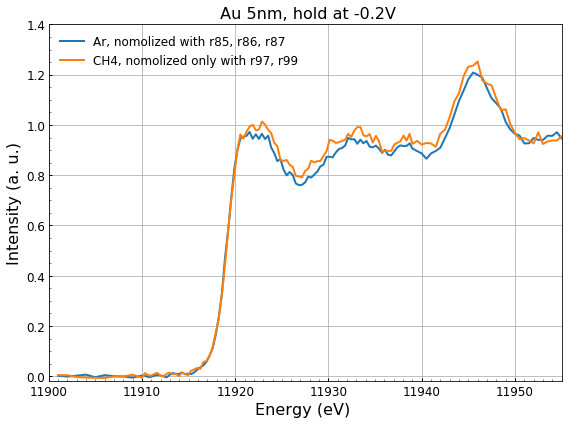

In [65]:
runs = [998,1000]
tittle = ['Ar, nomolized with r85, r86, r87','CH4, nomolized only with r97, r99']

folder_path ='/Volumes/Work/P64/HERFD'
#folder_path ='/Users/hsin-yiwang/Desktop/P64'

plt.figure(figsize=[8,6])
ax =plt.subplot(1,1,1)

for i in range(len(runs)):
    df = folder_path + "/" + 'HERFD_r%04d'%runs[i] + '.txt'
    ColumnsName = ['Energy','Intensity']
    CSVdata = pd.read_csv(df, sep=',')
    CSVdata.columns = ColumnsName
    Matrix = CSVdata.as_matrix(columns=CSVdata.columns[0:])
    InEnergy = Matrix[:,0]
    Her_curve = (Matrix[:,1])
    #plt.plot(InEnergy,Her_curve,lw=2, ls='-', label ='%s, run = r%04d' %(tittle[i], runs[i]))
    plt.plot(InEnergy,Her_curve,lw=2, ls='-', label ='%s' %(tittle[i]))
    plt.title(' Au 5nm, hold at -0.2V', size = 16)
    plt.xlim(11900,11955)
    plt.ylim(-0.02,1.4)
    plt.xlabel('Energy (eV) ',size=16)
    plt.ylabel('Intensity (a. u.)',size=16)
    plt.tick_params(direction='in', length=3, width=1, axis='both', which='major', labelsize=12)
    plt.tick_params(direction='in', length=2, width=0.5, axis='both', which='minor', labelsize=12)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    plt.grid(True)
    plt.tight_layout()
    plt.legend(frameon=False,loc='best', prop={'size': 12})
    plt.savefig('/Users/Hsin-YiWang/Desktop/HERFD Compared1.png', dpi=300)
plt.show()

